## Installation et Configuration de MLflow
Dans cette section, nous installons les dépendances nécessaires et configurons **MLflow** pour enregistrer nos expériences sur la plateforme **Dagshub**. Cela nous permettra de suivre les métriques, modèles, et artefacts générés lors de nos expériences.


In [3]:
!pip install mlflow dagshub --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.5/252.5 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 623.0/623.0 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8

In [5]:
import dagshub
dagshub.init(repo_owner='youcefkrookss', repo_name='test', mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=7deaeb40-8866-40b3-88d1-e1999d436727&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=6cf3687442b4af670c072b57223aeb6c1f4c14b5918b239ebc1cbe2bbd10ec0e




Accessing as adamgharib

Initialized MLflow to track repo "youcefkrookss/test"

Repository youcefkrookss/test initialized!

In [6]:
import mlflow

mlflow.set_tracking_uri('https://dagshub.com/youcefkrookss/test.mlflow')
mlflow.set_experiment(experiment_name="Rf_Cifar-100")

<Experiment: artifact_location='mlflow-artifacts:/3cf79c3ff233420ab7b1d0465b2f4571', creation_time=1733877997358, experiment_id='2', last_update_time=1733877997358, lifecycle_stage='active', name='Rf_Cifar-100', tags={}>

In [7]:
! pip install scikit-learn-intelex --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.4/91.4 MB 7.5 MB/s eta 0:00:00


# Chargement des Données CIFAR-100
Nous téléchargeons le dataset **CIFAR-100**, le décompressons et chargeons les données d'entraînement et de test. Ces données sont normalisées (divisées par 255.0) et les labels associés sont extraits pour l'entraînement.


In [8]:
from sklearnex import patch_sklearn
patch_sklearn()

import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split
import numpy as np

!wget https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz
!tar -xvzf cifar-100-python.tar.gz

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


--2024-12-11 11:35:37--  https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169001437 (161M) [application/x-gzip]
Saving to: ‘cifar-100-python.tar.gz’

cifar-100-python.ta 100%[===================>] 161.17M  11.7MB/s    in 12s     

2024-12-11 11:35:50 (12.9 MB/s) - ‘cifar-100-python.tar.gz’ saved [169001437/169001437]

cifar-100-python/
cifar-100-python/file.txt~
cifar-100-python/train
cifar-100-python/test
cifar-100-python/meta


In [9]:
import pickle

# Charger les données d'entraînement
with open("cifar-100-python/train", "rb") as f:
    train_data = pickle.load(f, encoding="latin1")

# Charger les données de test
with open("cifar-100-python/test", "rb") as f:
    test_data = pickle.load(f, encoding="latin1")

# Vérifier les clés des données
print(train_data.keys())  # Doit afficher 'data', 'fine_labels', etc.

dict_keys(['filenames', 'batch_label', 'fine_labels', 'coarse_labels', 'data'])


# Prétraitement des Données
Les images sont aplaties (de 32x32x3 → 3072 colonnes) pour être utilisées comme entrée dans le modèle **Random Forest**. Nous réduisons également la taille du dataset pour accélérer l'entraînement.


In [10]:
# Extraire les images
X_train = train_data['data'] / 255.0  # Images d'entraînement
X_test = test_data['data'] / 255.0    # Images de test

# Extraire les labels
y_train = train_data['fine_labels']
y_test = test_data['fine_labels']

X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Aplatir les images d'entraînement
X_test_flat = X_test.reshape(X_test.shape[0], -1)    # Aplatir les images de test

# Entraînement et Évaluation : Précision et Log Loss
Nous entraînons un modèle **Random Forest** avec les hyperparamètres définis et évaluons ses performances avec les métriques suivantes :
- **Précision** : Pourcentage de prédictions correctes.
- **Log Loss** : Une métrique qui punit les prédictions mal calibrées.
Les résultats sont enregistrés dans **MLflow**.


In [11]:



# Réduire modérément la taille du dataset
X_train_reduced, _, y_train_reduced, _ = train_test_split(X_train_flat, y_train, test_size=0.5, random_state=42)
X_test_reduced, _, y_test_reduced, _ = train_test_split(X_test_flat, y_test, test_size=0.5, random_state=42)


# Définir des hyperparamètres améliorés
params = {
    "n_estimators": 100,
    "max_depth": 20,
    "min_samples_split": 2,
    "min_samples_leaf": 1,
    "bootstrap": True
}

# Démarrer l'enregistrement dans MLflow
with mlflow.start_run(run_name="Improved Random Forest"):
    mlflow.log_params(params)

    # Entraîner le modèle Random Forest avec sklearnex
    rf = RandomForestClassifier(**params, random_state=42, class_weight="balanced")
    rf.fit(X_train_reduced, y_train_reduced)

    # Prédictions et évaluation
    y_pred = rf.predict(X_test_reduced)
    y_pred_proba = rf.predict_proba(X_test_reduced)
    acc = accuracy_score(y_test_reduced, y_pred)
    loss = log_loss(y_test_reduced, y_pred_proba)

    # Enregistrer les métriques
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("log_loss", loss)

    # Exemple d'entrée pour le modèle
    input_example = np.array(X_train_reduced[0]).reshape(1, -1)

    # Enregistrer le modèle avec sklearnex et l'exemple d'entrée
    mlflow.sklearn.log_model(
        sk_model=rf,
        artifact_path="model",
        input_example=input_example,
        pip_requirements=["scikit-learn==1.5.2", "scikit-learn-intelex"]
    )

    print(f"Précision obtenue : {acc}")
    print(f"Log loss obtenue : {loss}")

Précision obtenue : 0.2018
Log loss obtenue : 3.79565215170319
🏃 View run Improved Random Forest at: https://dagshub.com/youcefkrookss/test.mlflow/#/experiments/2/runs/6014df48e9914d20b21cd2af8b4a24b9
🧪 View experiment at: https://dagshub.com/youcefkrookss/test.mlflow/#/experiments/2


# Calcul du F1-Score
Le **F1-Score** est une métrique combinant la précision et le rappel, particulièrement utile pour des classes déséquilibrées. Nous calculons le F1-Score pondéré pour le modèle **Random Forest** et l'enregistrons dans MLflow.


In [12]:
from sklearnex import patch_sklearn
patch_sklearn()

import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import numpy as np

# Réduire modérément la taille du dataset
X_train_reduced, _, y_train_reduced, _ = train_test_split(X_train_flat, y_train, test_size=0.5, random_state=42)
X_test_reduced, _, y_test_reduced, _ = train_test_split(X_test_flat, y_test, test_size=0.5, random_state=42)


# Définir des hyperparamètres améliorés
params = {
    "n_estimators": 100,
    "max_depth": 20,
    "min_samples_split": 2,
    "min_samples_leaf": 1,
    "bootstrap": True
}

# Démarrer l'enregistrement dans MLflow
with mlflow.start_run(run_name="Random Forest F1-Score"):
    mlflow.log_params(params)

    # Entraîner le modèle Random Forest
    rf = RandomForestClassifier(**params, random_state=42, class_weight="balanced")
    rf.fit(X_train_reduced, y_train_reduced)

    # Prédictions
    y_pred = rf.predict(X_test_reduced)

    # Calculer le F1-Score (moyenne pondérée pour des classes multiples)
    f1 = f1_score(y_test_reduced, y_pred, average="weighted")

    # Enregistrer la métrique F1-Score
    mlflow.log_metric("f1_score", f1)

    # Exemple d'entrée pour le modèle
    input_example = np.array(X_train_reduced[0]).reshape(1, -1)

    # Enregistrer le modèle
    mlflow.sklearn.log_model(
        sk_model=rf,
        artifact_path="model",
        input_example=input_example,
        pip_requirements=["scikit-learn==1.5.2", "scikit-learn-intelex"]
    )

    print(f"F1-Score obtenu : {f1}")


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


F1-Score obtenu : 0.18240304336683444
🏃 View run Random Forest F1-Score at: https://dagshub.com/youcefkrookss/test.mlflow/#/experiments/2/runs/4e244004487648eabe2da93175cec2cc
🧪 View experiment at: https://dagshub.com/youcefkrookss/test.mlflow/#/experiments/2


# Calcul du Recall
Le **Recall** (ou Sensibilité) mesure la capacité du modèle à détecter toutes les instances positives. Nous calculons le Recall pondéré pour évaluer les performances du modèle sur toutes les classes.


In [13]:
from sklearnex import patch_sklearn
patch_sklearn()

import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
import numpy as np

# Réduire modérément la taille du dataset
X_train_reduced, _, y_train_reduced, _ = train_test_split(X_train_flat, y_train, test_size=0.5, random_state=42)
X_test_reduced, _, y_test_reduced, _ = train_test_split(X_test_flat, y_test, test_size=0.5, random_state=42)

# Définir des hyperparamètres améliorés
params = {
    "n_estimators": 100,
    "max_depth": 20,
    "min_samples_split": 2,
    "min_samples_leaf": 1,
    "bootstrap": True
}

# Démarrer l'enregistrement dans MLflow
with mlflow.start_run(run_name="Random Forest Recall"):
    mlflow.log_params(params)

    # Entraîner le modèle Random Forest
    rf = RandomForestClassifier(**params, random_state=42, class_weight="balanced")
    rf.fit(X_train_reduced, y_train_reduced)

    # Prédictions
    y_pred = rf.predict(X_test_reduced)

    # Calculer le Recall (moyenne pondérée pour des classes multiples)
    recall = recall_score(y_test_reduced, y_pred, average="weighted")

    # Enregistrer la métrique Recall
    mlflow.log_metric("recall", recall)

    # Exemple d'entrée pour le modèle
    input_example = np.array(X_train_reduced[0]).reshape(1, -1)

    # Enregistrer le modèle
    mlflow.sklearn.log_model(
        sk_model=rf,
        artifact_path="model",
        input_example=input_example,
        pip_requirements=["scikit-learn==1.5.2", "scikit-learn-intelex"]
    )

    print(f"Recall obtenu : {recall}")


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Recall obtenu : 0.2018
🏃 View run Random Forest Recall at: https://dagshub.com/youcefkrookss/test.mlflow/#/experiments/2/runs/5128bc88a2a34448be516ebe6b9945f8
🧪 View experiment at: https://dagshub.com/youcefkrookss/test.mlflow/#/experiments/2


# Matrice de Confusion
Nous générons et visualisons une **matrice de confusion** pour analyser les performances du modèle sur chaque classe. La matrice montre le nombre de prédictions correctes et les erreurs pour chaque classe. Elle est également enregistrée comme artefact dans MLflow.


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Matrice de confusion enregistrée dans MLflow.
🏃 View run Random Forest Confusion Matrix at: https://dagshub.com/youcefkrookss/test.mlflow/#/experiments/2/runs/2e9c99762f1041418c99b390fe65e4f3
🧪 View experiment at: https://dagshub.com/youcefkrookss/test.mlflow/#/experiments/2


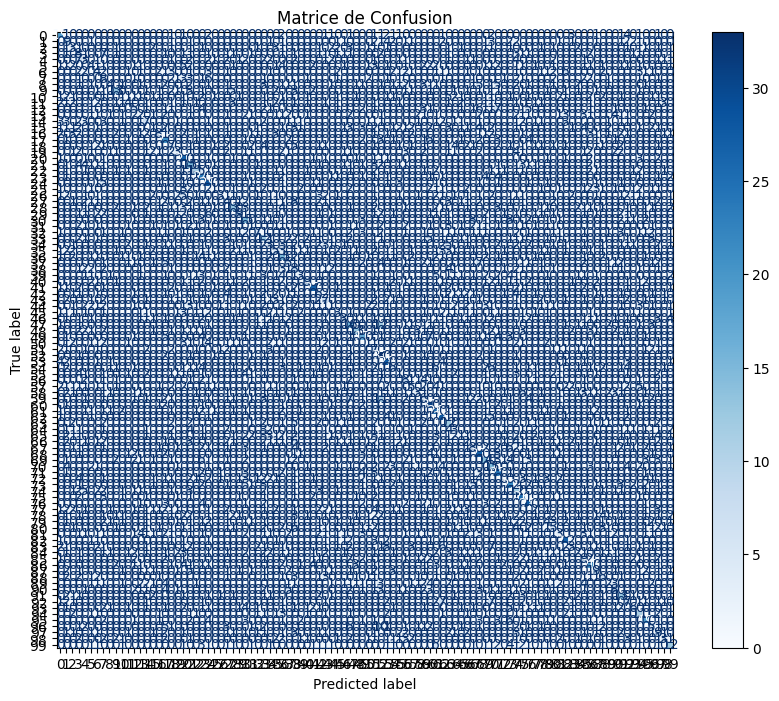

In [15]:
from sklearnex import patch_sklearn
patch_sklearn()

import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os

# Réduire modérément la taille du dataset
X_train_reduced, _, y_train_reduced, _ = train_test_split(X_train_flat, y_train, test_size=0.5, random_state=42)
X_test_reduced, _, y_test_reduced, _ = train_test_split(X_test_flat, y_test, test_size=0.5, random_state=42)

# Définir des hyperparamètres améliorés
params = {
    "n_estimators": 100,
    "max_depth": 20,
    "min_samples_split": 2,
    "min_samples_leaf": 1,
    "bootstrap": True
}

# Démarrer l'enregistrement dans MLflow
with mlflow.start_run(run_name="Random Forest Confusion Matrix"):
    mlflow.log_params(params)

    # Entraîner le modèle Random Forest
    rf = RandomForestClassifier(**params, random_state=42, class_weight="balanced")
    rf.fit(X_train_reduced, y_train_reduced)

    # Prédictions
    y_pred = rf.predict(X_test_reduced)

    # Calculer la matrice de confusion
    cm = confusion_matrix(y_test_reduced, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    # Tracer la matrice de confusion
    plt.figure(figsize=(10, 8))
    disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
    plt.title("Matrice de Confusion")
    plt.savefig("confusion_matrix.png")  # Sauvegarder l'image localement

    # Enregistrer la matrice de confusion comme artefact
    mlflow.log_artifact("confusion_matrix.png")

    print("Matrice de confusion enregistrée dans MLflow.")


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Matrice de confusion améliorée enregistrée dans MLflow.
🏃 View run Random Forest Confusion Matrix at: https://dagshub.com/youcefkrookss/test.mlflow/#/experiments/2/runs/ae074050f1d9454d9d48c0a57a5d38f1
🧪 View experiment at: https://dagshub.com/youcefkrookss/test.mlflow/#/experiments/2


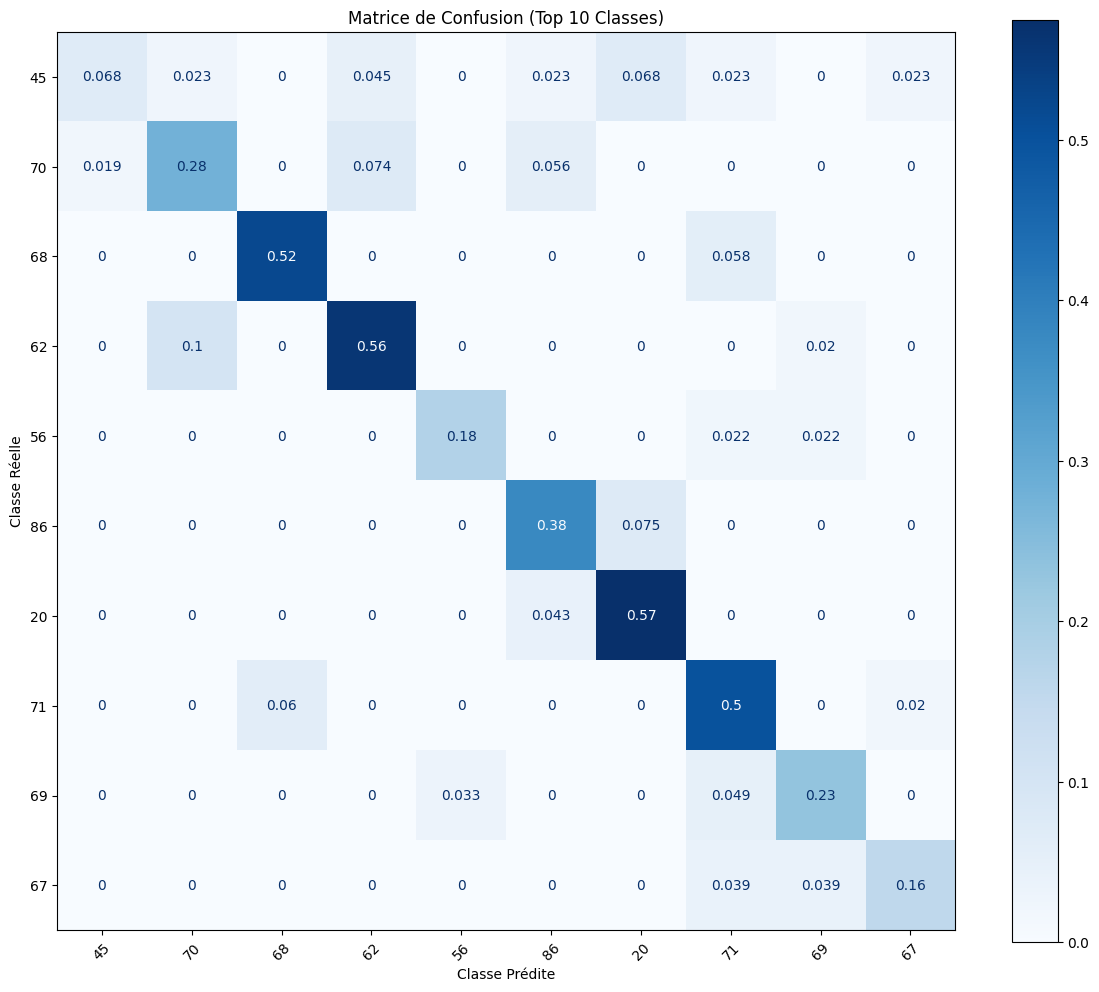

In [16]:
from sklearnex import patch_sklearn
patch_sklearn()

import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os

# Réduire modérément la taille du dataset
X_train_reduced, _, y_train_reduced, _ = train_test_split(X_train_flat, y_train, test_size=0.5, random_state=42)
X_test_reduced, _, y_test_reduced, _ = train_test_split(X_test_flat, y_test, test_size=0.5, random_state=42)

# Définir des hyperparamètres améliorés
params = {
    "n_estimators": 100,
    "max_depth": 20,
    "min_samples_split": 2,
    "min_samples_leaf": 1,
    "bootstrap": True
}

# Démarrer l'enregistrement dans MLflow
with mlflow.start_run(run_name="Random Forest Confusion Matrix"):
    mlflow.log_params(params)

    # Entraîner le modèle Random Forest
    rf = RandomForestClassifier(**params, random_state=42, class_weight="balanced")
    rf.fit(X_train_reduced, y_train_reduced)

    # Prédictions
    y_pred = rf.predict(X_test_reduced)

    # Calculer la matrice de confusion avec normalisation
    cm = confusion_matrix(y_test_reduced, y_pred, normalize='true')

    # Tracer uniquement les classes les plus confondues
    most_confused_classes = np.argsort(-np.sum(cm, axis=1))[:10]  # Top 10 classes les plus confondues
    cm_filtered = cm[np.ix_(most_confused_classes, most_confused_classes)]

    # Ajouter des noms de classes si disponibles
    if 'class_names' in locals():  # Assurez-vous d'avoir une liste `class_names`
        class_names_filtered = [class_names[i] for i in most_confused_classes]
    else:
        class_names_filtered = most_confused_classes

    # Affichage amélioré de la matrice de confusion
    plt.figure(figsize=(12, 10))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_filtered, display_labels=class_names_filtered)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation=45, ax=plt.gca())
    plt.title("Matrice de Confusion (Top 10 Classes)")
    plt.xlabel("Classe Prédite")
    plt.ylabel("Classe Réelle")
    plt.tight_layout()

    # Sauvegarder la matrice de confusion
    plt.savefig("confusion_matrix_improved.png")

    # Enregistrer comme artefact
    mlflow.log_artifact("confusion_matrix_improved.png")

    print("Matrice de confusion améliorée enregistrée dans MLflow.")


# Analyse des Valeurs SHAP

Dans cette section, nous utilisons les **valeurs SHAP** (SHapley Additive exPlanations) pour interpréter les prédictions du modèle **Random Forest**. SHAP permet d'analyser l'importance des caractéristiques en expliquant comment chaque variable contribue aux prédictions du modèle.

**Étapes clés :**
1. **Réduction des données** : Nous utilisons un sous-ensemble de données test (500 exemples) pour réduire le temps de calcul.
2. **Sélection des caractéristiques importantes** : Nous utilisons les 10 caractéristiques les plus significatives sélectionnées par le modèle.
3. **Exploration des contributions individuelles** : Un graphique de résumé est généré pour visualiser l'impact des caractéristiques sur les prédictions.

**Visualisation :**
Le graphique SHAP montre les caractéristiques les plus influentes et leur impact sur les prédictions. Il aide à comprendre pourquoi le modèle a pris certaines décisions.


In [ ]:
from sklearnex import patch_sklearn
patch_sklearn()

import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt
import numpy as np

# Réduire modérément la taille du dataset à 5000 exemples
X_train_reduced, _, y_train_reduced, _ = train_test_split(X_train_flat, y_train, test_size=0.9, random_state=42)
X_test_reduced, _, y_test_reduced, _ = train_test_split(X_test_flat, y_test, test_size=0.9, random_state=42)

# Définir des hyperparamètres améliorés
params = {
    "n_estimators": 100,
    "max_depth": 20,
    "min_samples_split": 2,
    "min_samples_leaf": 1,
    "bootstrap": True
}

# Démarrer l'enregistrement dans MLflow
with mlflow.start_run(run_name="Random Forest SHAP Explanation (Optimized)"):
    mlflow.log_params(params)

    # Entraîner le modèle Random Forest
    rf = RandomForestClassifier(**params, random_state=42, class_weight="balanced")
    rf.fit(X_train_reduced, y_train_reduced)

    # Sélectionner les 10 caractéristiques les plus importantes
    selector = SelectFromModel(rf, prefit=True, max_features=10)
    X_train_important = selector.transform(X_train_reduced)
    X_test_important = selector.transform(X_test_reduced)

    # Réentraîner le modèle avec les caractéristiques importantes
    rf.fit(X_train_important, y_train_reduced)

    # Limiter à 500 échantillons pour SHAP
    sample_size = 500
    X_test_sampled = X_test_important[:sample_size]

    # Générer les valeurs SHAP
    explainer = shap.Explainer(rf, X_test_sampled)
    shap_values = explainer(X_test_sampled)

    # Résumé graphique SHAP
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, X_test_sampled, show=False)
    plt.title("SHAP Summary Plot (Optimized)")
    plt.savefig("shap_summary_plot_optimized.png")  # Sauvegarder l'image localement

    # Enregistrer l'image SHAP dans MLflow comme artefact
    mlflow.log_artifact("shap_summary_plot_optimized.png")

    print("SHAP Summary Plot (Optimized) enregistré dans MLflow.")


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
100%|===================| 49999/50000 [56:39<00:00]       

In [1]:
pip install fastapi uvicorn scikit-learn mlflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.3 MB/s eta 0:00:00


In [3]:
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
import numpy as np
import mlflow.sklearn

# Initialiser l'application FastAPI
app = FastAPI()

# Schéma pour les données d'entrée
class PredictionRequest(BaseModel):
    data: list  # Les données doivent être une liste de valeurs

@app.get("/")
def home():
    return {"message": "API is running! Use the /predict endpoint to make predictions."}

@app.post("/predict")
def predict(request: PredictionRequest):
    # Vérifier que les données d'entrée sont valides
    if not request.data or not isinstance(request.data, list):
        raise HTTPException(status_code=400, detail="Invalid input data format. Provide a list of values.")

    try:
        # Préparer les données d'entrée
        input_data = np.array(request.data).reshape(1, -1)

        # Effectuer une prédiction
        prediction = model.predict(input_data)

        return {"prediction": prediction.tolist()}
    except Exception as e:
        raise HTTPException(status_code=500, detail=f"Error during prediction: {str(e)}")


In [5]:
pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=b87a8a15eb6699f3392214d065ffd8068bff0f9d9120afd1effb53fb79bab3e8
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


# Analyse avec LIME

Dans cette section, nous utilisons **LIME** (Local Interpretable Model-agnostic Explanations) pour interpréter les prédictions du modèle **Random Forest**. Contrairement à SHAP, LIME fournit des explications locales, c'est-à-dire qu'il explique une prédiction spécifique en générant une approximation locale.

**Étapes clés :**
1. **Échantillon à expliquer** : Nous sélectionnons une prédiction spécifique à analyser.
2. **Génération d'explications locales** : LIME perturbe les données et observe comment les prédictions changent.
3. **Visualisation** : LIME génère un graphique pour montrer l'importance locale des caractéristiques.

**Visualisation :**
Le graphique LIME montre les caractéristiques qui ont influencé une prédiction spécifique et leur contribution positive ou négative.


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


LIME Explanation pour l'échantillon 0 enregistrée dans MLflow.
🏃 View run Random Forest LIME Explanation at: https://dagshub.com/youcefkrookss/test.mlflow/#/experiments/2/runs/573579ad672845999c493e4346345fe3
🧪 View experiment at: https://dagshub.com/youcefkrookss/test.mlflow/#/experiments/2


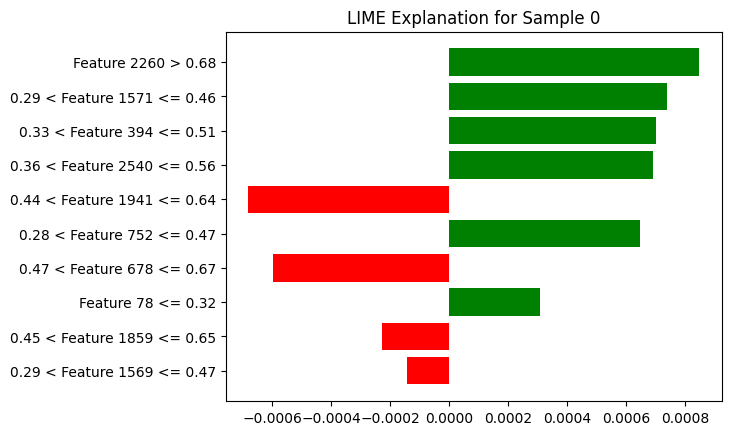

In [13]:
from sklearnex import patch_sklearn
patch_sklearn()

import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
import numpy as np
import os

# Réduire modérément la taille du dataset
X_train_reduced, _, y_train_reduced, _ = train_test_split(X_train_flat, y_train, test_size=0.5, random_state=42)
X_test_reduced, _, y_test_reduced, _ = train_test_split(X_test_flat, y_test, test_size=0.5, random_state=42)

# Définir des hyperparamètres améliorés
params = {
    "n_estimators": 100,
    "max_depth": 20,
    "min_samples_split": 2,
    "min_samples_leaf": 1,
    "bootstrap": True
}

# Démarrer l'enregistrement dans MLflow
with mlflow.start_run(run_name="Random Forest LIME Explanation"):
    mlflow.log_params(params)

    # Entraîner le modèle Random Forest
    rf = RandomForestClassifier(**params, random_state=42, class_weight="balanced")
    rf.fit(X_train_reduced, y_train_reduced)

    # Sélectionner un échantillon à expliquer
    sample_index = 0  # Choisissez une prédiction spécifique
    sample_data = X_test_reduced[sample_index].reshape(1, -1)
    sample_label = y_test_reduced[sample_index]

    # Générer une explication LIME
    explainer = LimeTabularExplainer(
        training_data=X_train_reduced,  # Données d'entraînement
        mode="classification",
        training_labels=y_train_reduced,
        feature_names=[f"Feature {i}" for i in range(X_train_reduced.shape[1])],
        class_names=[f"Class {i}" for i in range(len(set(y_train_reduced)))],
        random_state=42
    )

    explanation = explainer.explain_instance(
        data_row=sample_data.flatten(),
        predict_fn=rf.predict_proba  # Fonction de prédiction
    )

    # Sauvegarder l'explication LIME
    explanation_fig = explanation.as_pyplot_figure()
    plt.title(f"LIME Explanation for Sample {sample_index}")
    lime_filename = "lime_explanation_sample.png"
    plt.savefig(lime_filename)

    # Enregistrer l'explication LIME dans MLflow
    mlflow.log_artifact(lime_filename)

    print(f"LIME Explanation pour l'échantillon {sample_index} enregistrée dans MLflow.")


# Validation Croisée

Nous utilisons une **validation croisée stratifiée** pour évaluer la robustesse et la performance de notre modèle **Random Forest** sur plusieurs sous-ensembles des données d'entraînement. La validation croisée est essentielle pour réduire les risques d'overfitting et mesurer les performances moyennes du modèle.

**Étapes clés :**
1. **Division des données** : Nous utilisons 5 plis (stratifiés) pour garantir une répartition équilibrée des classes.
2. **Calcul des métriques** : Nous enregistrons la précision et le F1-Score pour chaque pli.
3. **Enregistrement des résultats** : Les métriques par pli et leurs moyennes sont enregistrées dans **MLflow**.

**Résultats :**
Les métriques de validation croisée fournissent une évaluation complète des performances moyennes et aident à identifier des éventuels problèmes de généralisation du modèle.


In [14]:
from sklearnex import patch_sklearn
patch_sklearn()

import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Réduire modérément la taille du dataset
X_train_reduced, _, y_train_reduced, _ = train_test_split(X_train_flat, y_train, test_size=0.5, random_state=42)

# Définir des hyperparamètres améliorés
params = {
    "n_estimators": 100,
    "max_depth": 20,
    "min_samples_split": 2,
    "min_samples_leaf": 1,
    "bootstrap": True
}


# Démarrer l'enregistrement dans MLflow
with mlflow.start_run(run_name="Random Forest Cross-Validation"):
    mlflow.log_params(params)

    # Modèle Random Forest
    rf = RandomForestClassifier(**params, random_state=42, class_weight="balanced")

    # Cross-validation stratifiée
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = cross_val_score(rf, X_train_reduced, y_train_reduced, cv=cv, scoring="accuracy")
    f1_scores = cross_val_score(rf, X_train_reduced, y_train_reduced, cv=cv, scoring="f1_weighted")

    # Enregistrer les scores de cross-validation dans MLflow
    for fold_idx, (acc, f1) in enumerate(zip(accuracies, f1_scores)):
        mlflow.log_metric(f"cv_accuracy_fold_{fold_idx+1}", acc)
        mlflow.log_metric(f"cv_f1_fold_{fold_idx+1}", f1)

    # Enregistrer la moyenne des scores
    mlflow.log_metric("cv_accuracy_mean", accuracies.mean())
    mlflow.log_metric("cv_f1_mean", f1_scores.mean())

    print(f"Cross-validation terminée : Précision moyenne = {accuracies.mean():.4f}, F1-score moyen = {f1_scores.mean():.4f}")


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Cross-validation terminée : Précision moyenne = 0.1798, F1-score moyen = 0.1608
🏃 View run Random Forest Cross-Validation at: https://dagshub.com/youcefkrookss/test.mlflow/#/experiments/2/runs/d746eea3b24b4e31b4a1b6c69b64cdad
🧪 View experiment at: https://dagshub.com/youcefkrookss/test.mlflow/#/experiments/2
